In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

In [2]:
style = 'dark_background'
# style = 'fivethirtyeight'
# style = 'default'
plt.style.use('default')
plt.style.use(style)

if style.count('dark') > 0:
    mpl.rcParams["figure.facecolor"] = "#21212100"
    mpl.rcParams["axes.facecolor"]= "#21212100"
    mpl.rcParams["savefig.facecolor"]= "#21212100"
    line_color = '.-w'
else:
    line_color = '.-k'

In [3]:
kernels = [
    'linear',
    'oldroyd',
    'poly',
    'cosine',
    'rbf'
]

kernels_filtered = [
    'linear',
    'oldroyd',
    'cosine',
    'rbf'
]


In [4]:

data =  [np.memmap(f'../../npz_data/KPCA_4roll/X_{x}.npz', dtype='float32', mode='r', shape=(36000,20)) for x in kernels]

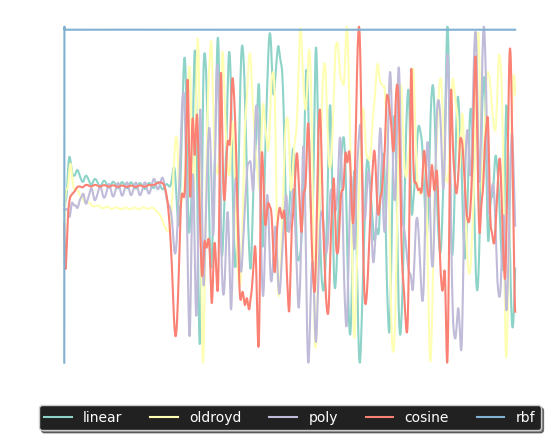

In [21]:
sim = 11
q =15

for i, k in enumerate(kernels):
    plot_data = data[i][sim*3000:(sim+1)*3000,q]

    plot_data = (plot_data - plot_data.min()) / (plot_data.max() - plot_data.min())

    plt.plot(plot_data, label = k)
    # plt.title(k)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

# plt.yscale('log')

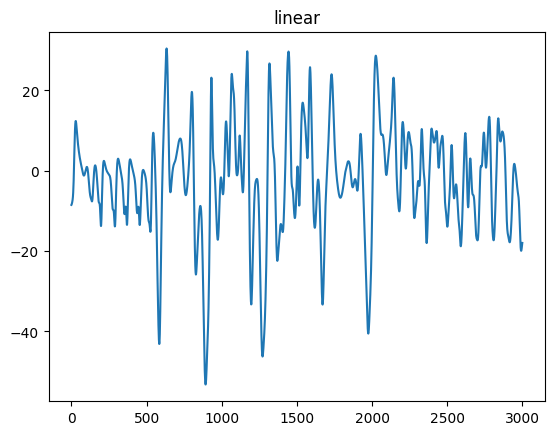

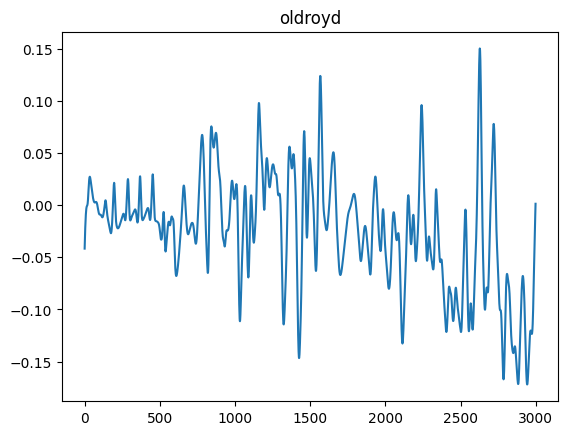

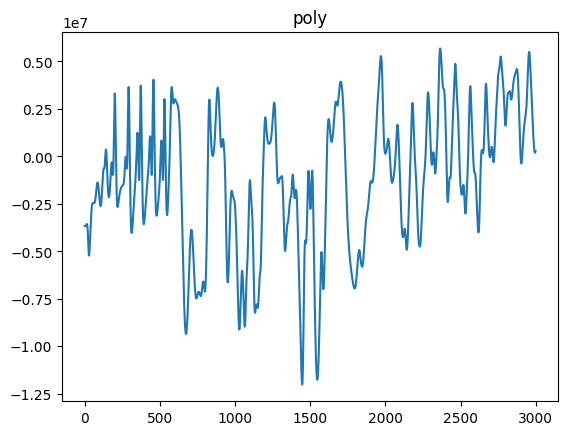

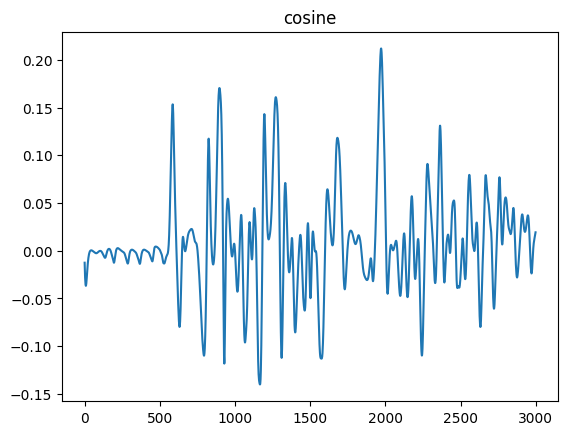

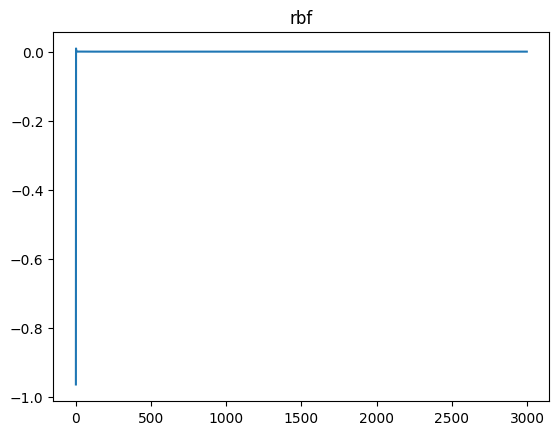

In [6]:
sim = 7
q =15

for i, k in enumerate(kernels):
    plt.figure()
    plot_data = data[i][sim*3000:(sim+1)*3000,q]

    # plot_data = (plot_data - plot_data.min()) / (plot_data.max() - plot_data.min())

    plt.plot(plot_data, label = k)
    plt.title(k)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

# plt.yscale('log')

In [7]:
data_U =  [np.load(f'../../npz_data/KPCA_4roll/U_fit_{x}.npz',allow_pickle=True) for x in kernels]

In [8]:
param = np.repeat((1,2,.5), 5).reshape((3,-1)).T
print(param,(1-param[:,2])/(param[:,0] * param[:,1]))
np.sqrt((1-param[:,2])/(param[:,0] * param[:,1])).reshape((-1,1)).shape

[[1.  2.  0.5]
 [1.  2.  0.5]
 [1.  2.  0.5]
 [1.  2.  0.5]
 [1.  2.  0.5]] [0.25 0.25 0.25 0.25 0.25]


(5, 1)

In [9]:
data_U[3]['eigenvalues']

array([ 1.7902719e+03,  9.5444763e+02,  9.1482623e+02, ...,
       -1.0398849e-02, -1.7136948e-02, -5.0457563e-02], dtype=float32)

Text(0.5, 1.0, 'Cummulative Energy')

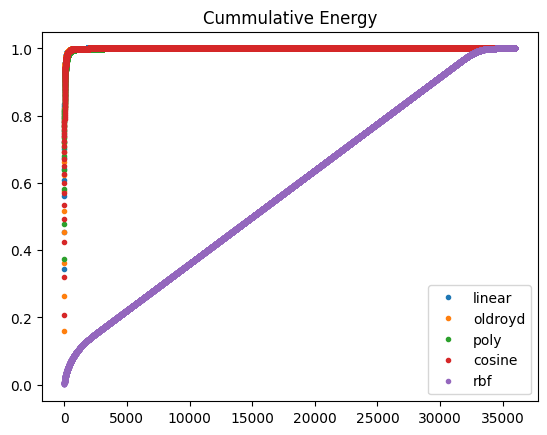

In [10]:
for i, k in enumerate(kernels):
    e = data_U[i]['eigenvalues']
    energy = np.cumsum(e)/e.sum()
    plt.plot(energy,'.' ,label = k)

plt.legend()
plt.title('Cummulative Energy')
# plt.yscale('log')

# Reconstruction Results

In [11]:
results_files = [f'results_Kernel_4RollOSC_Latent_20_energy_False_Kernel_{k}_train' for k in kernels]

In [30]:
def get_results_kpca(ds, norm = False):
    energy_total = np.zeros(len(kernels))
    mse_total = np.zeros(len(kernels))
    for i,k in enumerate(kernels):
        # if k == 'poly':
        #     continue
        fname = f'Results/results_Kernel_linear_4RollOSC_Latent_20_energy_False_Kernel_{k}_{ds}'
        if norm:
            fname += '_Norm-in'
        fname +='.txt'
        with open(fname, 'r') as f:
            lines = f.readlines()

            energy_err_line = lines[1::3]
            mse_err_line = lines[2::3]

            energy_err = [float(l.split(':')[-1]) for l in energy_err_line]
            mse_err = [float(l.split(':')[-1]) for l in mse_err_line]

            energy_total[i] = np.mean(energy_err)
            mse_total[i] = np.mean(mse_err)

    return energy_total, mse_total


Text(0.5, 1.0, 'MSE Error')

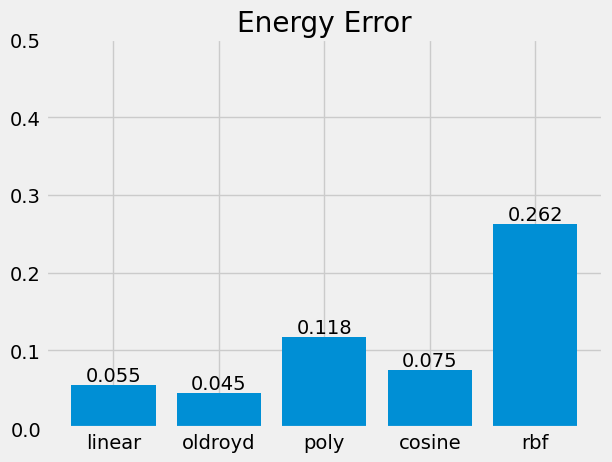

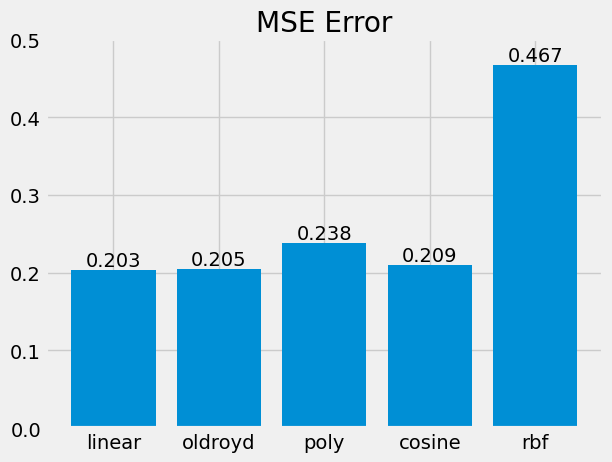

In [32]:
energy_total, mse_total = get_results_kpca('train', norm = False)

b1 = plt.bar(kernels, energy_total)
plt.ylim([0,.5])
for rect in b1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, np.min((height, 0.47)), f'{height:.3f}', ha='center', va='bottom')
    # if height >= .5:
    #     plt.text(rect.get_x() + rect.get_width() / 2.0, .47, f'{height:.3f}', ha='center', va='bottom')
plt.title('Energy Error')


plt.figure()
b1 = plt.bar(kernels, mse_total)
plt.ylim([0,.5])
for rect in b1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, np.min((height, 0.47)), f'{height:.3f}', ha='center', va='bottom')
plt.title('MSE Error')


## box plot

In [11]:
def boxplot_kpca(ds:str, norm = False, metric = 'mse', vert = True, kernels_filtered = kernels):

    fname = f'Results/Results_Kernel_4RollOSC_Latent_20_energy_False_{kernels_filtered[0]}_{ds}'
    if norm:
        fname += '_Norm-in'
    fname +='.npz'
    
    data = np.load(fname, allow_pickle='True')
    total = np.zeros((data[metric].shape[0], len(kernels_filtered)))
    for i,k in enumerate(kernels_filtered):
        # if k == 'poly':
        #     continue
        fname = f'Results/Results_Kernel_4RollOSC_Latent_20_energy_False_{k}_{ds}'
        if norm:
            fname += '_Norm-in'
        fname +='.npz'
        
        data = np.load(fname, allow_pickle='True')

        total[:, i] = data[metric]

    plt.figure()
    _ = plt.boxplot(total, labels=kernels_filtered, showmeans =True, meanline=True,vert=vert, showfliers=False)
    # _ = plt.boxplot(total, labels=kernels, showmeans =True, meanline=True,vert=vert, whis = (0,100))
    plt.title(f'{metric.upper() if metric.casefold() == "mse" else metric.capitalize()}')
    plt.grid(axis='y', alpha = 0.3)
    plt.xlabel('Kernel')
    plt.ylabel('Error')


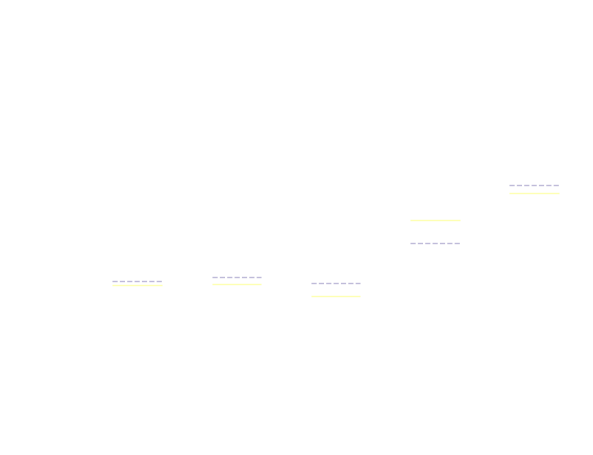

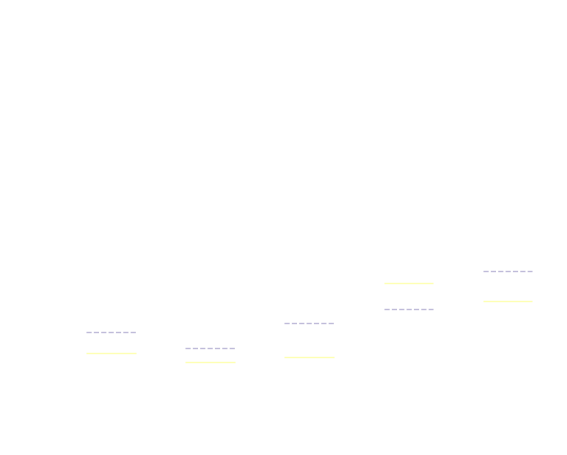

In [17]:
kernels_filtered = [
    'linear',
    'oldroyd',
    'cosine',
    'poly',
    'rbf'
]

boxplot_kpca('test', norm=True, metric ='mse', kernels_filtered=kernels_filtered)
boxplot_kpca('test', norm=True, metric ='energy', kernels_filtered=kernels_filtered)

### Linear Reconstruction

In [13]:
def boxplot_kpca_linear(ds:str, metric = 'mse', vert = True, kernels_filtered = kernels):

    fname = f'Results/results_Kernel_linear_4RollOSC_Latent_20_energy_False_{kernels_filtered[0]}_{ds}'
    fname +='.npz'
    
    data = np.load(fname, allow_pickle='True')
    total = np.zeros((data[metric].shape[0], len(kernels_filtered)))
    for i,k in enumerate(kernels_filtered):
        # if k == 'poly':
        #     continue
        fname = f'Results/results_Kernel_linear_4RollOSC_Latent_20_energy_False_{k}_{ds}'

        fname +='.npz'
        
        data = np.load(fname, allow_pickle='True')

        total[:, i] = data[metric]

    plt.figure()
    _ = plt.boxplot(total, labels=kernels_filtered, showmeans =True, meanline=True,vert=vert, showfliers=False)
    # _ = plt.boxplot(total, labels=kernels, showmeans =True, meanline=True,vert=vert, whis = (0,100))
    plt.title(f'{metric.upper() if metric.casefold() == "mse" else metric.capitalize()}')
    plt.grid(axis='y', alpha = 0.3)
    plt.xlabel('Kernel')
    plt.ylabel('Error')


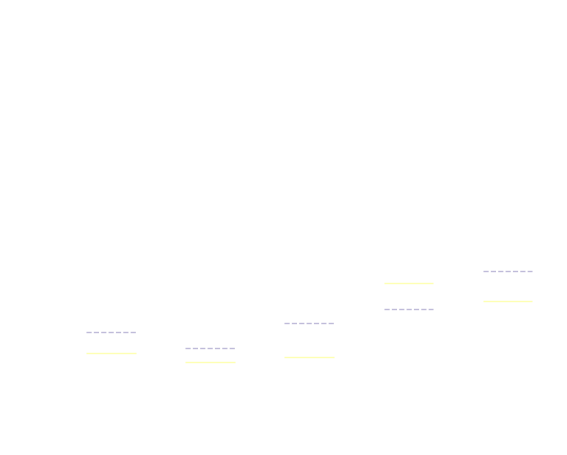

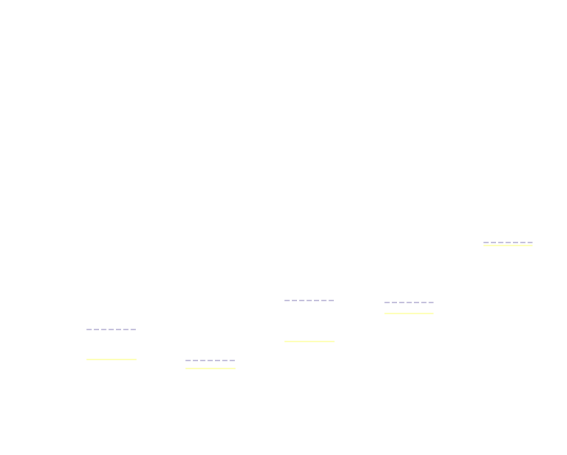

In [14]:
boxplot_kpca('test', norm=True, metric ='energy', kernels_filtered=kernels_filtered)
boxplot_kpca_linear('test', metric ='energy', kernels_filtered=kernels)

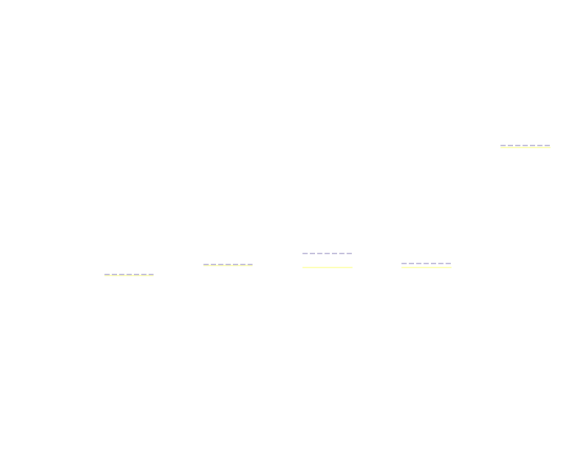

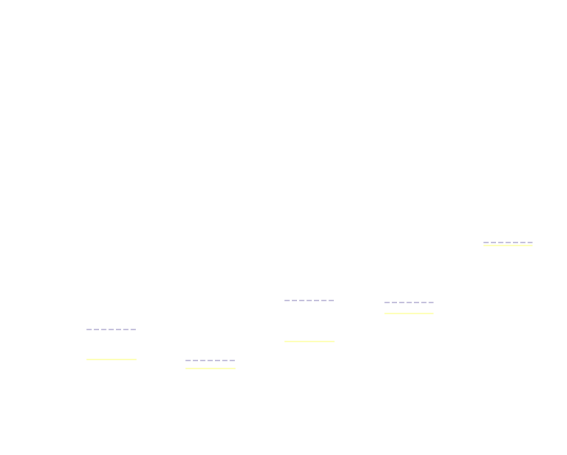

In [16]:
boxplot_kpca_linear('test', metric ='mse', kernels_filtered=kernels)
boxplot_kpca_linear('test', metric ='energy', kernels_filtered=kernels)

## Autoencoder

In [6]:


betas = [10**i for i in range(-3,2,1)]

In [7]:
def boxplot_autoencoder(ds:str, metric = 'mse', vert = True, kernels_filtered = kernels, beta = 0.01, linear = False, nmodes = 20):
    nl = 12 if ds == 'train' else 5
    energy_total = np.zeros((nl,len(kernels_filtered) +2))
    mse_total = np.zeros((nl,len(kernels_filtered) +2))
    for i,k in enumerate(kernels_filtered):
        # if k == 'poly':
        #     continue
        if linear:
            fname = f'Results/results_Kernel_linear_4RollOSC_Latent_{nmodes}_energy_False_Kernel_{k}_{ds}'
        else:
            fname = f'Results/results_Kernel_4RollOSC_Latent_{20}_energy_False_Kernel_{k}_{ds}'
            fname += '_Norm-in'

        #  if norm:
         # fname += '_Norm-in'
        fname +='.txt'
        with open(fname, 'r') as f:
            lines = f.readlines()
            energy_err_line = lines[1::3]
            mse_err_line = lines[2::3]

            energy_err = [float(l.split(':')[-1]) for l in energy_err_line]
            mse_err = [float(l.split(':')[-1]) for l in mse_err_line]

            energy_total[:, i] = energy_err
            mse_total[:, i] = mse_err


    # for i,k in enumerate(kernels_filtered):
    #     # if k == 'poly':
    #     #     continue
    #     fname = f'Results/results_Kernel_linear_4RollOSC_Latent_20_energy_False_{k}_{ds}'

    #     fname +='.npz'
        
    #     data = np.load(fname, allow_pickle='True')

    #     energy_total[:, i] = data['energy']
    #     mse_total[:, i] = data['mse']

    with open(f'Results/Results_Kernel_4RollOSC_Latent_20_energy_{False}_beta_{beta:g}_{ds}.txt', 'rt') as f:
        lines = f.readlines()

        energy_err_line = lines[1::5]
        mse_err_line = lines[2::5]

        energy_err = [float(l.split(':')[-1]) for l in energy_err_line]
        mse_err = [float(l.split(':')[-1]) for l in mse_err_line]

        energy_total[:, -2] = energy_err
        mse_total[:, -2] = mse_err
    with open(f'Results/Results_Kernel_4RollOSC_Latent_20_energy_{True}_beta_{beta:g}_{ds}.txt', 'rt') as f:
        lines = f.readlines()

        energy_err_line = lines[1::5]
        mse_err_line = lines[2::5]

        energy_err = [float(l.split(':')[-1]) for l in energy_err_line]
        mse_err = [float(l.split(':')[-1]) for l in mse_err_line]

        energy_total[:, -1] = energy_err
        mse_total[:, -1] = mse_err

    total = energy_total if metric == 'energy' else mse_total
    labels = kernels_filtered + ['VAE\nMSE', 'VAE\nEnergy']
    plt.figure()
    _ = plt.boxplot(total, labels=labels, showmeans =True, meanline=True,vert=vert, showfliers=False)
    # _ = plt.boxplot(total, labels=kernels, showmeans =True, meanline=True,vert=vert, whis = (0,100))
    plt.title(f'{metric.upper() if metric.casefold() == "mse" else metric.capitalize()}')
    plt.grid(axis='y', alpha=.3)

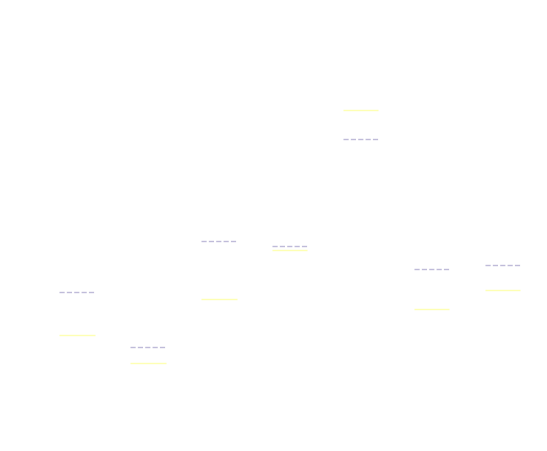

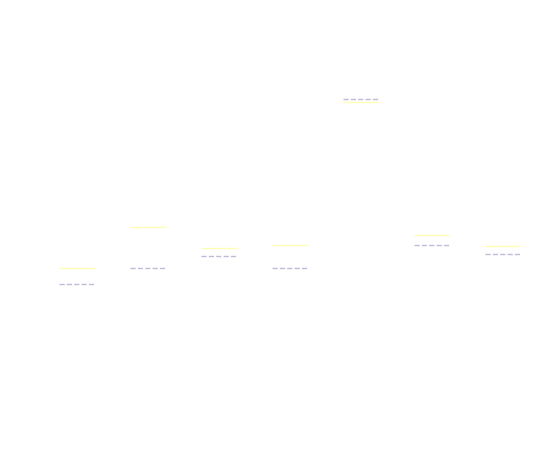

In [18]:
boxplot_autoencoder('test',metric = 'energy', kernels_filtered = kernels, beta = 1e-3, linear=True, nmodes = 20)
boxplot_autoencoder('test',metric = 'mse', kernels_filtered = kernels, beta = 1e-3, linear=True, nmodes = 20)

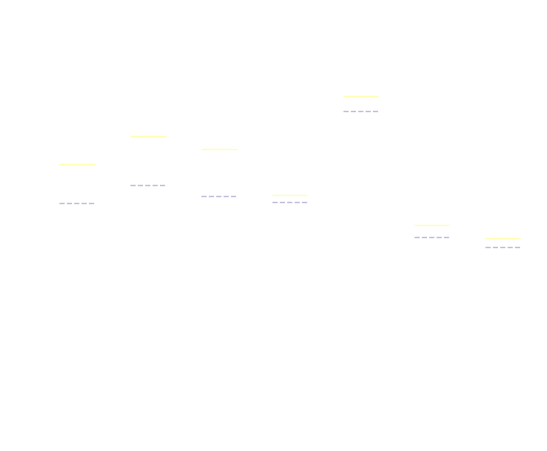

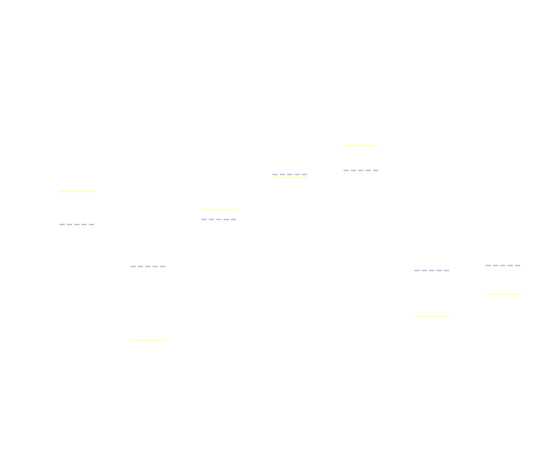

In [19]:
boxplot_autoencoder('test',metric = 'mse', kernels_filtered = kernels, beta = 1e-3, linear=True, nmodes = 5)
boxplot_autoencoder('test',metric = 'energy', kernels_filtered = kernels, beta = 1e-3, linear=True, nmodes = 5)

In [98]:
def plot_results(energy = False, ds = 'train', cutoff = 1e-2):
    ## MSE - Train
    mse_betas = np.zeros_like(betas)
    mse_betas_good = np.zeros_like(betas)
    mse_betas_bad = np.zeros_like(betas)
    numlat_betas = np.zeros_like(betas)
    dkl_betas = np.zeros((len(betas), 20))
    for i,b in enumerate(betas):
        with open(f'Results/Results_Kernel_4RollOSC_Latent_20_energy_{energy}_beta_{b:g}_{ds}.txt', 'rt') as f:
            lines = f.readlines()
        param_line = lines[0::5]
        error_line = lines[1::5]
        dkl_line = lines[3::5]

        mse_error = np.array([float(x.split()[-1]) for x in error_line])
        dkl = np.array([eval(x.replace('KL Divergence: ', '')) for x in dkl_line], dtype=float)

        mse_betas[i] = mse_error.mean()
        numlat_betas[i] = np.sum(dkl.mean(0)>cutoff)
        dkl_betas[i] = dkl.mean(0)
    for i,b in enumerate(betas):
        with open(f'Results/Results_Kernel_remove-bad_4RollOSC_Latent_20_energy_{energy}_beta_{b:g}_{ds}.txt', 'rt') as f:
            lines = f.readlines()
        param_line = lines[0::5]
        error_line = lines[1::5]
        dkl_line = lines[3::5]

        mse_error = np.array([float(x.split()[-1]) for x in error_line])
        dkl = np.array([eval(x.replace('KL Divergence: ', '')) for x in dkl_line], dtype=float)

        mse_betas_good[i] = mse_error.mean()



    # f, ax = plt.subplots(1,3, figsize=(25,6))

    ## Energy Error
    # ax[0].plot(betas, mse_betas,line_color, label = 'Full')
    # ax[0].plot(betas, mse_betas_good,'g--', label = 'Reduced')
    # ax[0].set_xscale('log')
    # ax[0].set_xlabel('$\\mathbb{D}_{KL}$ Weight')
    # ax[0].set_ylabel('Rel. Energy Error')
    # ax[0].legend()
    # ## Number of Modes
    # ax[1].plot(betas, numlat_betas,line_color)
    # ax[1].set_xscale('log')
    # ax[1].set_xlabel('$\\mathbb{D}_{KL}$ Weight')
    # ax[1].set_ylabel('# of Relevant latent variables')
    # ax[1].set_yticks(np.unique(numlat_betas))

    # ## KL Div.
    # for b, dkl in zip(betas, dkl_betas):
    #     idx = np.argsort(dkl)
    #     idx = np.flip(idx)
    #     ax[2].plot(np.arange(0,20),dkl[idx],'o-', label = '$\\beta_{KL}$ = '+f'{b:g}')
    # ax[2].set_yscale('log')
    # ax[2].set_ylabel('$\\mathbb{D}_{KL}$')
    # ax[2].set_xlabel('Latent Variable Index')
    # ax[2].set_xticks([x for x in np.arange(0,20,4)] + [19])

    # ax[2].axhline(y=cutoff, color='r', linestyle='--', alpha = 0.5)

    # plt.legend(loc='center left',bbox_to_anchor=(1., .727))

    ###############################
    ###### Mundo Invertido ########
    ###############################
    f, ax = plt.subplots(1,3, figsize=(30,7))
    ## KL Div.
    for b, dkl in zip(betas, dkl_betas):
        idx = np.argsort(dkl)
        idx = np.flip(idx)
        ax[0].plot(np.arange(0,20),dkl[idx],'o-', label = '$\\beta_{KL}$ = '+f'{b:g}')
    ax[0].set_yscale('log')
    ax[0].set_ylabel('$\\mathbb{D}_{KL}$')
    ax[0].set_xlabel('Latent Variable Index')
    ax[0].set_xticks([x for x in np.arange(0,20,4)] + [19])

    ax[0].axhline(y=cutoff, color='r', linestyle='--', alpha = 0.5)

    ax[0].legend(loc='center left',bbox_to_anchor=(-0.03, -0.25), ncols=3)
    ## Energy Error
    ax[2].plot(betas, mse_betas,line_color, label = 'Full')
    ax[2].plot(betas, mse_betas_good,'g--', label = 'Reduced')
    ax[2].set_xscale('log')
    ax[2].set_xlabel('$\\mathbb{D}_{KL}$ Weight')
    ax[2].set_ylabel('Rel. Energy Error')
    ax[2].legend()
    ## Number of Modes
    ax[1].plot(betas, numlat_betas,line_color)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('$\\mathbb{D}_{KL}$ Weight')
    ax[1].set_ylabel('# of Relevant latent variables')
    ax[1].set_yticks(np.unique(numlat_betas))

    f.suptitle(f'{ds.capitalize()} Dataset')
    return dkl_betas

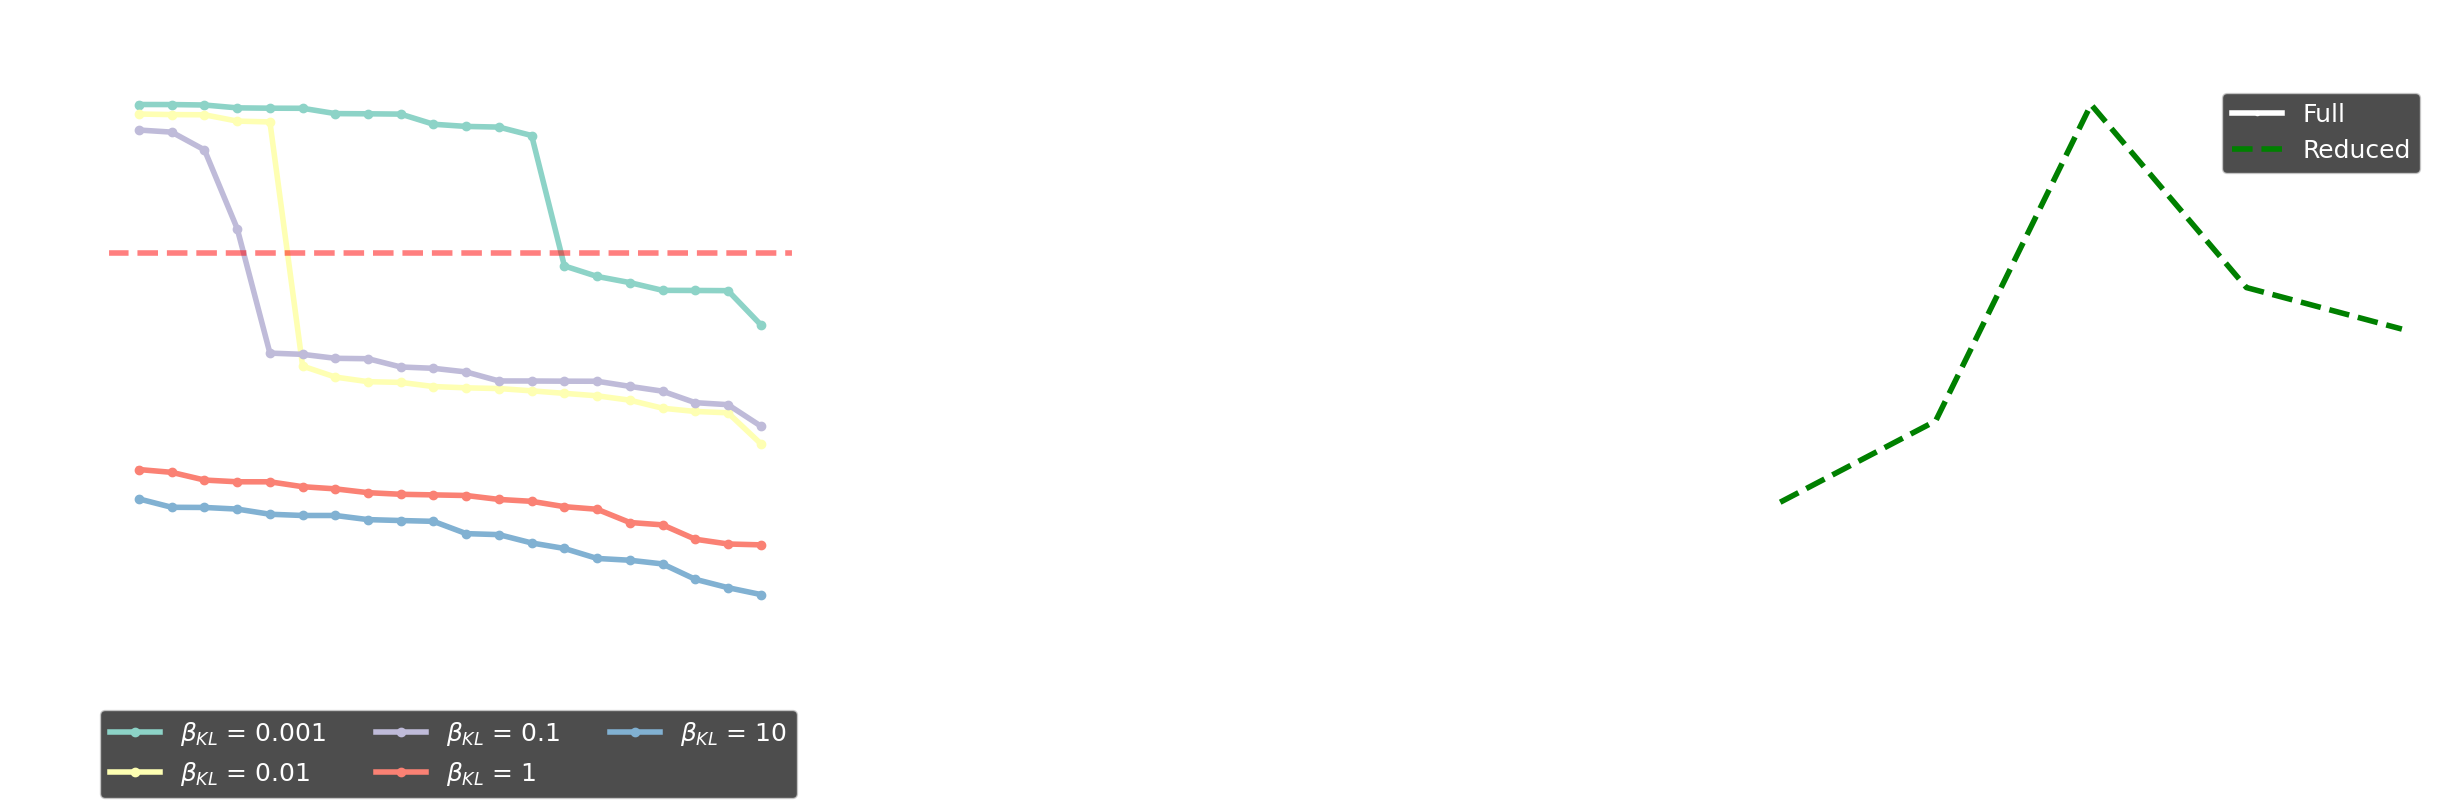

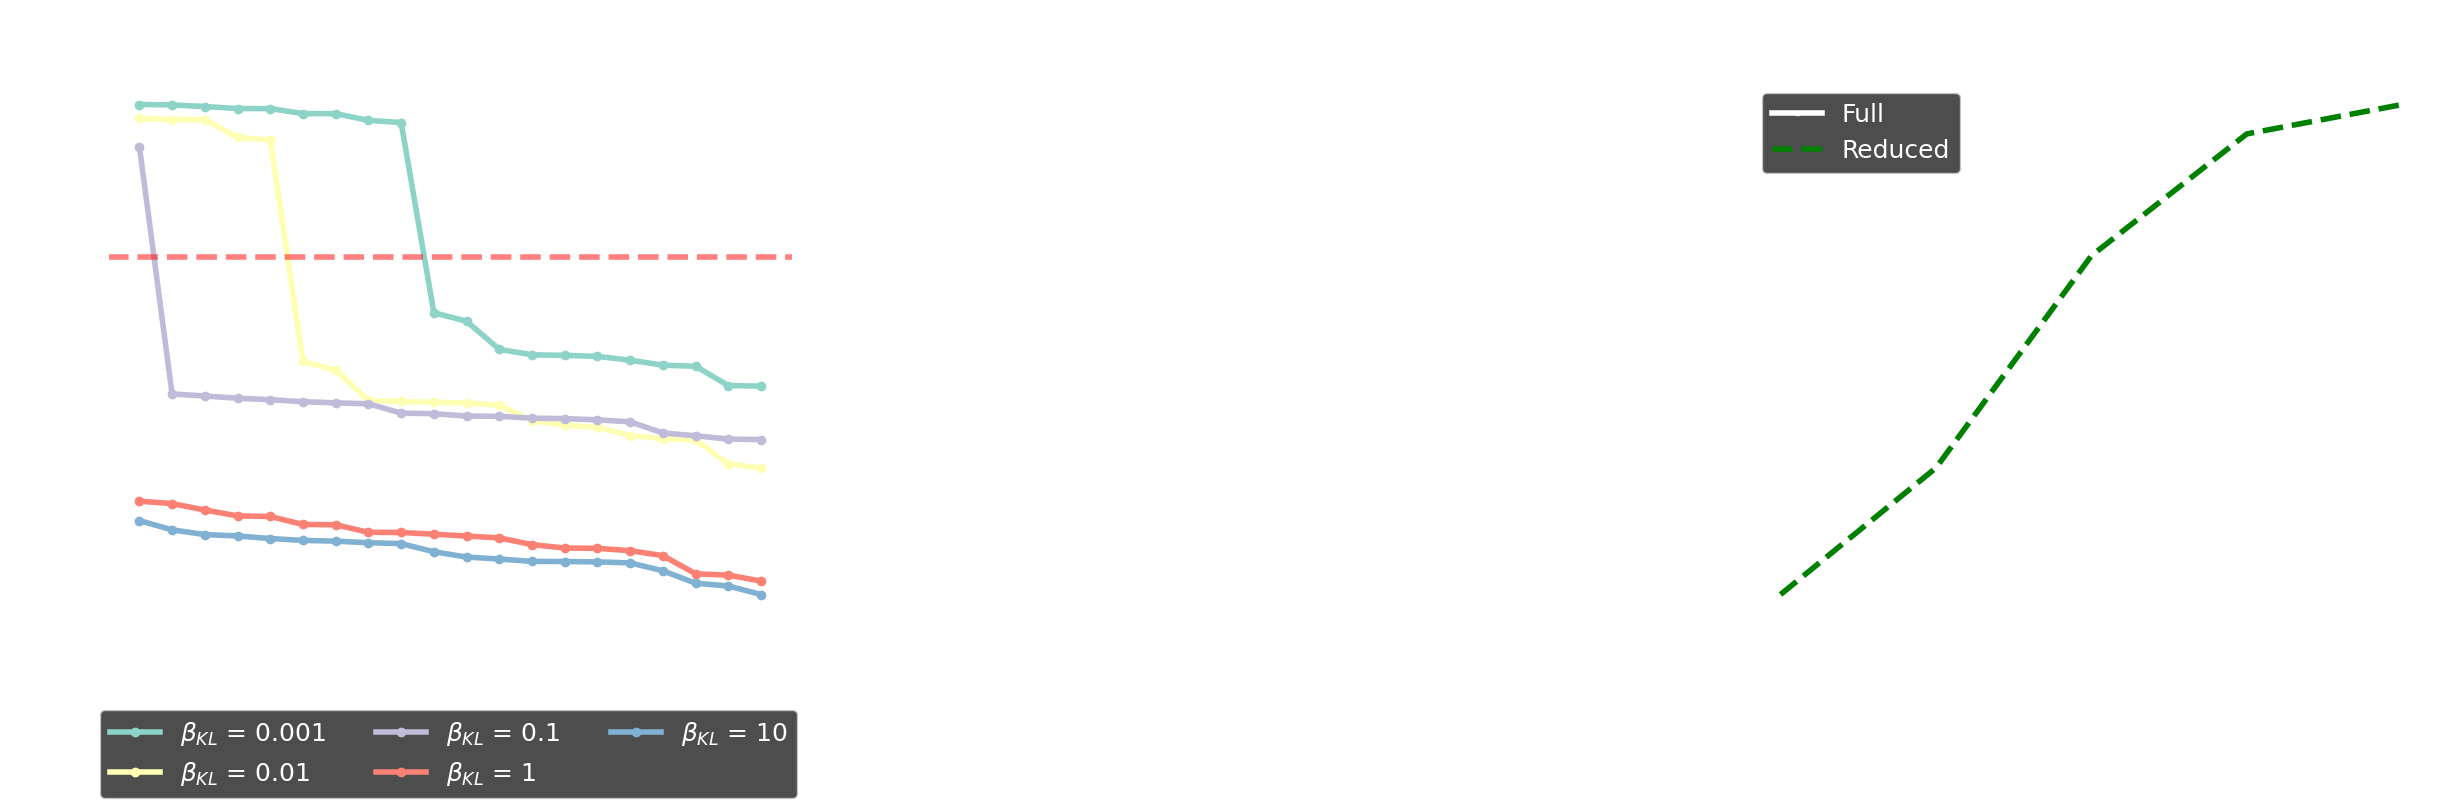

In [99]:
mpl.rcParams["font.size"] = 18
mpl.rcParams['lines.linewidth'] = 4

plot_results(energy = False, ds = 'test')
dkl = plot_results(energy = True, ds = 'test')

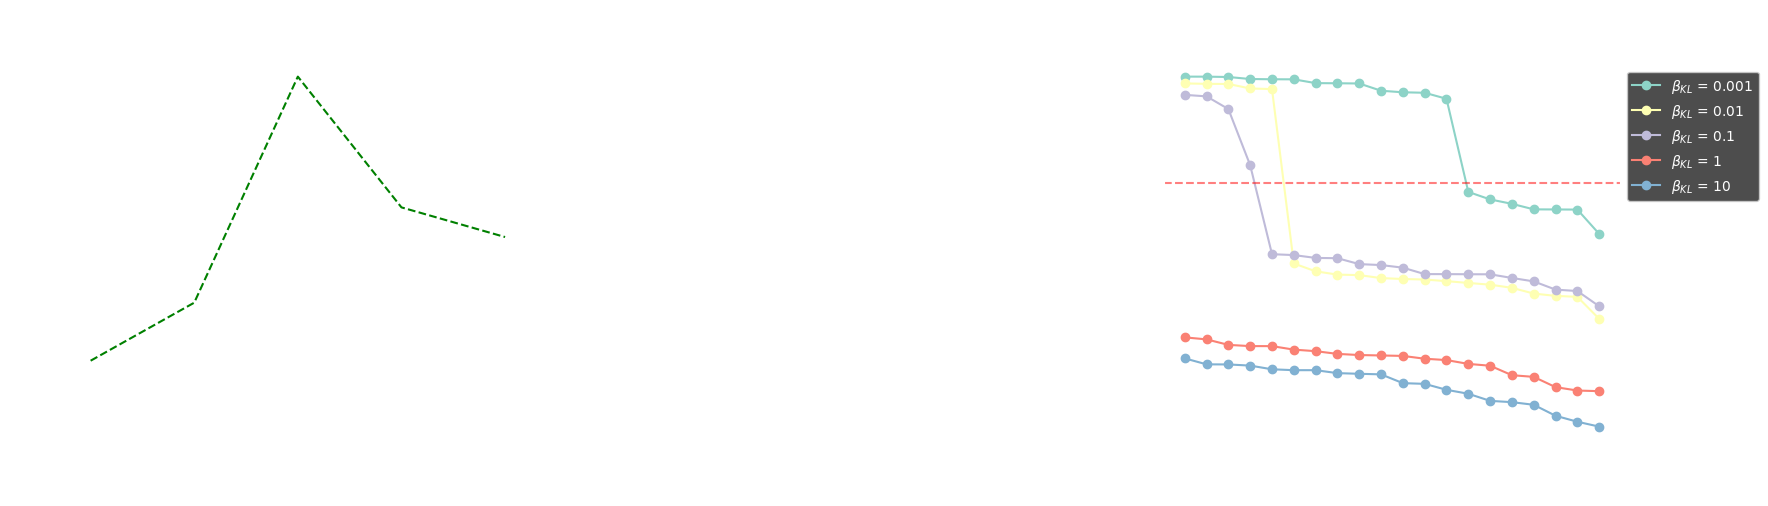

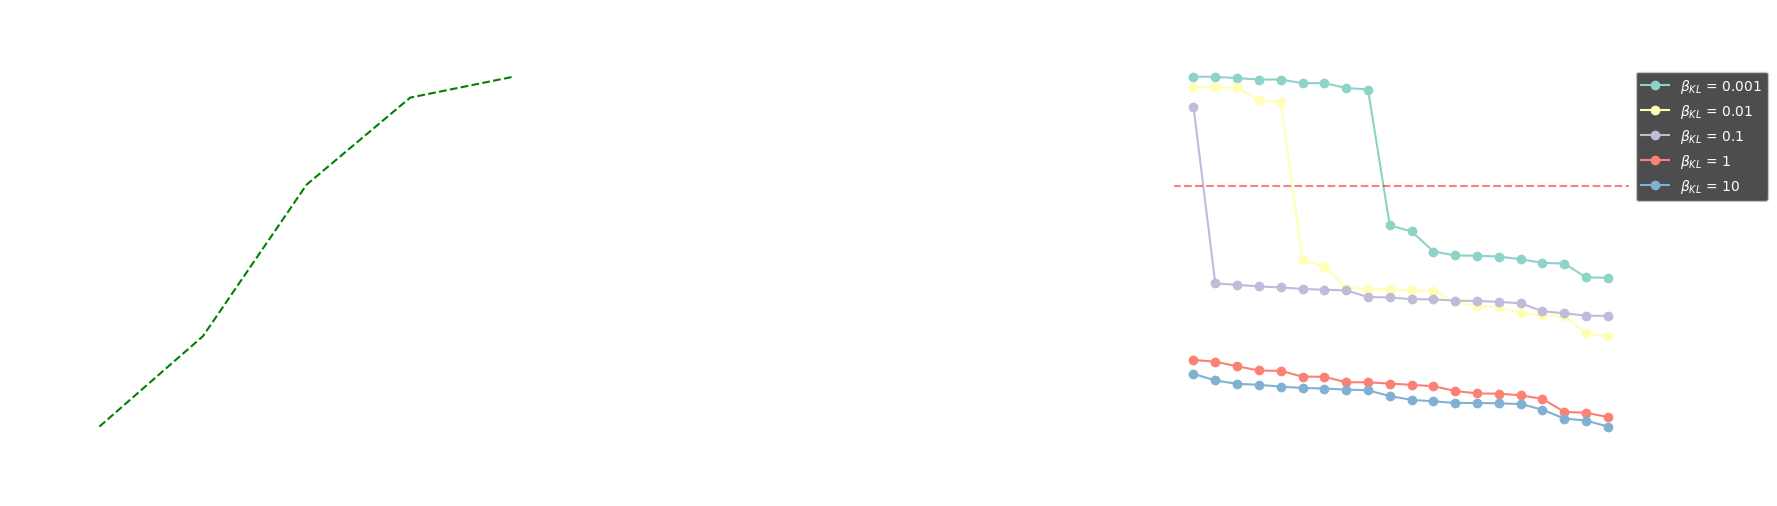

In [62]:
plot_results(energy = False, ds = 'test')
_=plot_results(energy = True, ds = 'test')

# Plot exemple

In [ ]:
import sys 
sys.path.append('../src') 
from utils import calc_energy

In [72]:
Re = 1
Wi = 7.5
beta = 0.6

in_filename = f"../../npz_data/4_roll6_Re1_Wi{Wi:g}_beta{beta:g}_dataset.npz" # u,v,B
fields = np.load(in_filename, allow_pickle=True)["fields"].item()
u = fields["vel-u"]
v = fields["vel-v"]
Bxx = fields["Bxx"]
Bxy = fields["Bxy"]
Byy = fields["Byy"]
qq = np.stack((u,v,Bxx, Bxy, Byy), axis=-1)
T =np.moveaxis(qq, 2,3)
T = T.reshape((64*64*5,-1))

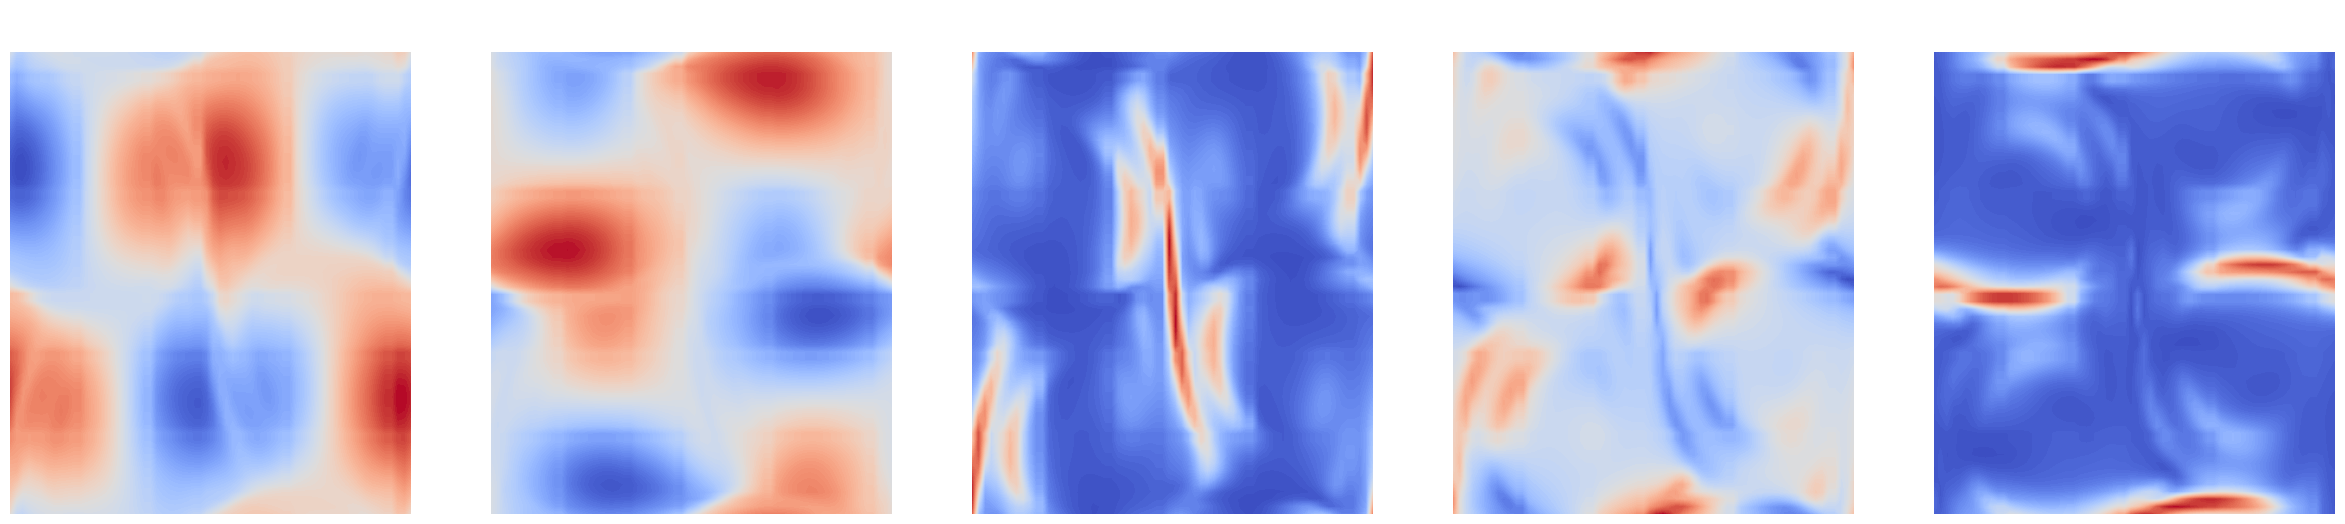

In [95]:
cmap = 'coolwarm'
snap = 600
titles = ['u', 'v', 'Bxx', 'Bxy', 'Byy']
f, ax = plt.subplots(1,5,figsize=(30,6))
lv = 100
ax[0].contourf(u[:,:, snap], cmap=cmap, levels = lv)
ax[1].contourf(v[:,:, snap], cmap=cmap, levels = lv)
ax[2].contourf(Bxx[:,:, snap], cmap=cmap, levels = lv)
ax[3].contourf(Bxy[:,:, snap], cmap=cmap, levels = lv)
ax[4].contourf(Byy[:,:, snap], cmap=cmap, levels = lv)

for i in range(5):
    ax[i].axis('off')
    ax[i].set_title(titles[i], fontsize = 30)

In [74]:
qq = np.stack((u,v,Bxx, Bxy, Byy), axis=-1)
_,_,e = calc_energy(T,Re=1, Wi = 5.5, beta = 0.9, dx = 1/2**6)

Text(0.5, 0, 'Snapshot')

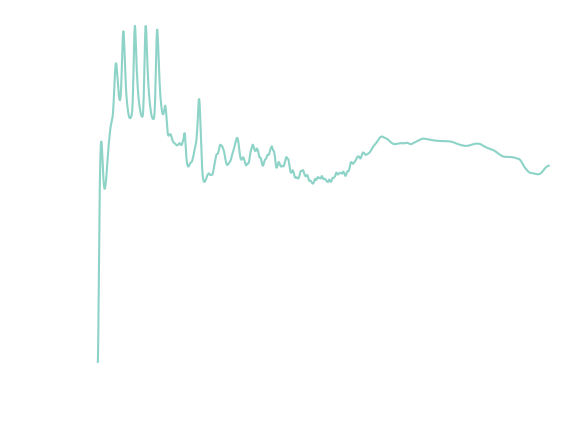

In [93]:
plt.plot(e[:3000])
fs = 20
plt.ylabel('Total Energy', fontsize =fs)
plt.xlabel('Snapshot', fontsize =fs)